<a href="https://colab.research.google.com/github/vitoriaferreirap/DeepLearning/blob/main/CNN_Computer_Vision/01_fashion_mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplo de Visão Computacional
Analisar um cenário onde podemos reconhecer diferentes peças de roupa, com base em um conjunto de dados contendo 10 tipos diferentes.

 ## TensorFlow
Para cada neuronio "por baixo dos panos" ele cria 128 núcleos (células de processamento). Para cada um desses 128 neurônios, ele cria automaticamente uma lista de pesos ($W$) e um bias ($b$). Ele já deixa a fórmula $z = (W \cdot X) + b$ pronta dentro de cada um deles. Ele já aplica a função de ativação ReLU no resultado.
TensorFlow biblioteca de alto nível.

In [1]:
# importação do TensorFlow
import tensorflow as tf
from tensorflow.keras import layers, models
print(tf.__version__)

2.19.0


Treinar uma rede neural para reconhecer peças de roupa a partir de um conjunto de dados comum chamado Fashion MNIST.(https://github.com/zalandoresearch/fashion-mnist).

Ele contém 70.000 peças de roupa em 10 categorias diferentes. Cada peça de roupa está em uma imagem em tons de cinza de 28x28 pixels. Você pode ver alguns exemplos aqui:

![alt text](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)

Os dados do Fashion MNIST estão disponíveis diretamente na API de conjuntos de dados do tf.keras. Você os carrega assim:

In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
#Chamar o método load_data nesse objeto retornará dois conjuntos de duas listas, que serão os valores de treinamento e teste para os gráficos que contêm as peças de roupa e seus respectivos rótulos
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


##Papel do Programador(training_images[5]):
Faz uma inspeção, abre a "caixa 5" para ter certeza de que o dado é bom. Se você abrisse a caixa e visse um borrão ou uma imagem errada, saberia que o modelo nunca aprenderia direito. É o seu controle de qualidade.

##Papel da IA (model.fit):
Ela não precisa do plt.imshow. Ela "engole" as 60.000 matrizes de números de uma vez. Ela compara cada matriz com o rótulo correspondente e vai ajustando os milhares de pesos ($W$) e bias ($b$) até que a matemática faça sentido para todas as imagens.
No modelo os 128 neurônios da camada oculta começam a se organizar:
Um grupo de neurônios pode se especializar em detectar linhas verticais (mangas).
Outro grupo pode se especializar em detectar o vazio entre as pernas (calças).
A combinação desses sinais é o que faz a IA "concluir" o que é uma camisa.

2
[[  0   0   0   0   1   0   0   0   0  22  88 188 172 132 125 141 199 143
    9   0   0   0   1   0   0   0   0   0]
 [  0   0   0   1   0   0  20 131 199 206 196 202 242 255 255 250 222 197
  206 188 126  17   0   0   0   0   0   0]
 [  0   0   0   1   0  35 214 191 183 178 175 168 150 162 159 152 158 179
  183 189 195 185  82   0   0   0   0   0]
 [  0   0   0   0   0 170 190 172 177 176 171 169 162 155 148 154 169 174
  175 175 177 183 188  12   0   0   0   0]
 [  0   0   0   0  25 194 180 178 174 184 187 189 187 184 181 189 200 197
  193 190 178 175 194  90   0   0   0   0]
 [  0   0   0   0  42 218 191 197 208 204 211 209 210 212 211 214 215 213
  214 211 211 191 200 158   0   0   0   0]
 [  0   0   0   0  88 221 215 217 219 211 185 150 118 107  99  88  83  90
  135 212 203 207 219 169   0   0   0   0]
 [  0   0   0   0   0  27 118 162  40   0   0   0  10  19  28  39  47  36
    0   0 203 230 220 203   0   0   0   0]
 [  0   0   0   0 138 136  71  69  54 216 217 203 184 168 163 

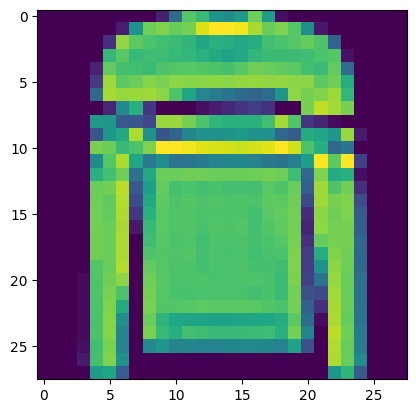

In [4]:
# Imagem de treinamento e um rótulo de treinamento, experimentar com diferentes índices na matriz.
import matplotlib.pyplot as plt
plt.imshow(training_images[5])
print(training_labels[5])#NUMERO REFERENCIA DO CALCADO ESPECIFICO
print(training_images[5]) #MATRIZ DE PIXEL DE UM CALCADO ESPECIFICO

# Img em numeros/Intensidade de pixel = 0 espaço vazio(preto) / 255 parte da roupa(branco/cinza claro)

Você vai notar que todos os valores no número estão entre 0 e 255. Se estivermos treinando uma rede neural, por vários motivos, é mais fácil tratar todos os valores como estando entre 0 e 1, um processo chamado de '**normalização**' e, felizmente, em Python é fácil normalizar uma lista como essa sem usar um loop.

In [6]:
# Normalizar uma lista sem usar um loop.
# Acurácia de Treino/Acurácia de Teste
#"reshape" para 3D
training_images  = training_images.reshape((60000, 28, 28, 1)) / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)) / 255.0

Existem dois conjuntos(treinamento e teste)  A ideia é ter um conjunto de dados para treinamento e outro conjunto de dados que o modelo ainda não viu, para ver o quão bem ele se sairia na classificação de valores. Afinal, quando terminar, você vai querer testá-lo com dados que ele nunca viu antes!

In [7]:
#Criando a arquitetura CNN
#TREINO
model = models.Sequential([
    # Primeira camada convolucional: 32 filtros de tamanho 3x3
    # 3x3 = karnel "janala que desliza"
    # 32 filtros que buscam coisas diferentes "linha vetical/ circulo/ textura"
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Camada poling - olha um bloco de 2x2pixels e pega apenas o maior valor
    # Diminiu pela metade a img - foca no que importa e pega se tiver variacao de localidade
    layers.MaxPooling2D((2, 2)),

    # Segunda camada convolucional: 64 filtros
    # Aumento de Filtros (32 -> 64): Aumenta a complexidade do que é reconhecido.
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten = Pega todos os mapas de características (que agora são pequenos e profundos) e estica em uma linha só.
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') # 10 categorias de roupas
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Sequencial**: Define uma SEQUÊNCIA de camadas na rede neural.

**Camadas Densas**: Decidem a classe com base no "resumo" das convoluções.

**ReLU** significa, efetivamente, "Se X > 0, retorne X; caso contrário, retorne 0" — ou seja, ela passa apenas valores iguais ou maiores que 0 para a próxima camada da rede.

**Softmax** pega um conjunto de valores e escolhe o maior deles. Por exemplo, se a saída da última camada for [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], ela evita que você precise procurar o maior valor, transformando-o em [0,0,0,0,1,0,0,0,0] — o objetivo é economizar bastante código!

O próximo passo, agora que o modelo está definido, é construí-lo. Isso é feito compilando-o com um otimizador e uma função de perda, como antes, e então treinando-o ao chamar o método `model.fit`, solicitando que ele ajuste os dados de treinamento aos rótulos de treinamento — ou seja, que determine a relação entre os dados de treinamento e seus rótulos reais. Assim, no futuro, se você tiver dados semelhantes aos dados de treinamento, o modelo poderá prever como esses dados se comportarão.

In [8]:
# Compila com um otimizador e funcao de perda loss
# 1 epoca - todas as imagens analisadas
# Loss(perda) - diminui conforma epocas
# Acuracia(precisão) - aumenta conforma epocas
# Enquanto o GD comum desce a montanha em passos constantes, o Adam ajusta a velocidade da descida para cada peso individualmente (ele tem "memória").
# Quando ele age? Toda vez que o model.fit processa um lote de imagens, o Adam calcula o erro (Loss), vê para que lado a montanha desce (Gradiente) e empurra os pesos naquela direção.
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)
# Acuracia = das 60.000 imagens que o modelo viu e revisou durante o treino, ele acertou 92%.
# Loss = Ele é um número escalar que representa o "custo" do erro.

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.7613 - loss: 0.6561
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 31ms/step - accuracy: 0.8803 - loss: 0.3308
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9011 - loss: 0.2693
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9134 - loss: 0.2357
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9208 - loss: 0.2158


In [9]:
# GENERALIZAÇÃO
# capacidade do modelo de manter um desempenho alto em dados que ele nunca viu.
# Acurácia de Treino: O quanto ele aprendeu com os exemplos que viu.
# Acurácia de Teste (Evaluate): O quanto ele aprendeu o conceito geral.
# ve a perda entre acuracia de treino e de teste
# O QUE SERA PRECISO: modelo aprenda o movimento da pata e não apenas decore o fundo da fazenda ou a cor de um cavalo específico. Generalização.
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9004 - loss: 0.2789


[0.271334171295166, 0.9024999737739563]

##Gap de Generalização:
Diferença entre acurácia de treino(compilação) e a acurácia de teste(generalização)


```
# Isto está formatado como código
```


- Se o Gap é pequeno: O modelo é saudável. Ele aprendeu padrões que se aplicam a qualquer imagem de roupa.

- Se o Gap fosse grande: Teríamos um problema chamado Overfitting. O modelo teria decorado os mínimos detalhes (até o ruído) das fotos de treino e ficaria "burro" para fotos novas.
